# LDA

In [ ]:
! pip install pyLDAvis  # installing the library

In [39]:
import gensim
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import wordnet
import numpy as np
import nltk
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
nltk.download('all') # We need this dataset in order to use the tokenizer

In [41]:
df = pd.read_csv("imdb_labelled.txt", sep='\t', header = None) # text file is read into csv
df.columns = ['text','ratings'] # labeled the columns

In [42]:
df.head()

,text,ratings
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


### After importing the necessary packages and modules. Now it is time for some preprocessing as explained before

In [43]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))   # Initialize the lemmatizer
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:        # Remove the stopwords and stem each word to its root
            result.append(lemmatize_stemming(token))
    return result
processed_docs = df['text'].map(preprocess)

In [44]:
processed_docs[1]

['sure', 'lose', 'flat', 'charact', 'audienc', 'near', 'half', 'walk']

#### To create a bag of words on the data set, Gensim dictionary can be used.

In [45]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():                   # Prior to topic modelling, we convert the tokenized and lemmatized text to a bag of words
    print(k, v)
    count += 1
    if count > 20:
        break

0 aimless
1 distress
2 drift
3 move
4 movi
5 slow
6 young
7 audienc
8 charact
9 flat
10 half
11 lose
12 near
13 sure
14 walk
15 act
16 angl
17 arti
18 attempt
19 black
20 camera


In [46]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)  #To remove the tokens that appear in less than 15 documents and above the 0.5 document 
                                                                          #(fraction of the total document, not absolute value). After that , keep the 100000 most frequent tokens.

In [47]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]  #I created a dictionary that shows which words and how many times those words appear in each document and saved them as bow_corpus:

#  run LDA topic model

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(bow_corpus, num_topics=3, id2word=dictionary, passes=2) #Need to specify how many topics are there in the data set.
                                                                        #I have passed 3 topics 

In [49]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))      # The output from the model is a 3 topics each categorized by a series of words.
                                                            # LDA model doesn’t give a topic name to those words

Topic: 0 
Words: 0.202*"movi" + 0.149*"watch" + 0.082*"love" + 0.051*"thing" + 0.051*"work" + 0.050*"littl" + 0.044*"plot" + 0.032*"excel" + 0.027*"bore" + 0.026*"play"
Topic: 1 
Words: 0.259*"movi" + 0.065*"like" + 0.052*"stori" + 0.050*"act" + 0.046*"charact" + 0.040*"scene" + 0.038*"film" + 0.036*"great" + 0.031*"direct" + 0.031*"best"
Topic: 2 
Words: 0.128*"charact" + 0.094*"actor" + 0.074*"play" + 0.070*"great" + 0.052*"recommend" + 0.049*"plot" + 0.043*"funni" + 0.042*"enjoy" + 0.042*"film" + 0.039*"see"
Topic: 3 
Words: 0.284*"film" + 0.098*"good" + 0.052*"time" + 0.040*"think" + 0.040*"movi" + 0.037*"like" + 0.029*"wast" + 0.026*"cast" + 0.025*"act" + 0.022*"know"


### Evaluate topic models

Output:

Lower the perplexity better the model.
Higher the topic coherence, the topic is more human interpretable.

In [ ]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus)); 
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

In [51]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [52]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.063611 -0.022243       1        1  33.146511
3      0.022670 -0.127154       2        1  31.135059
0     -0.124875  0.080171       3        1  17.930918
2      0.165817  0.069227       4        1  17.787512, topic_info=       Term        Freq       Total Category  logprob  loglift
0      movi  203.000000  203.000000  Default  30.0000  30.0000
14     film  167.000000  167.000000  Default  29.0000  29.0000
35    watch   51.000000   51.000000  Default  28.0000  28.0000
1   charact   65.000000   65.000000  Default  27.0000  27.0000
9      good   50.000000   50.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
14     film   11.231862  167.797030   Topic4  -3.1678  -0.9773
32    write    1.379307   22.803565   Topic4  -5.2650  -1.0787
20    excel    1.085755   18.499382   Topic4  -5.5043  -1.1088
35    watch    2.540817   51.222416   Topic4  -4.6541  -1.2770
0      movi    2.698033  203.938034   Topic4  -4.5940  -2.5986

[161 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         1  0.571474    act
2         2  0.274308    act
2         3  0.160013    act
2         4  0.022859    act
16        1  0.144106  actor
...     ...       ...    ...
32        4  0.043853  write
33        1  0.260375   year
33        2  0.416600   year
33        3  0.156225   year
33        4  0.156225   year

[157 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

# Guided LDA

preprocessing functions

In [53]:
# Here, new preprocess has been created, wanted to include wordnet position also.

def get_wordnet_pos(word):
    '''tags parts of speech to tokens
    Expects a string and outputs the string and 
    its part of speech'''
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
def word_lemmatizer(text):
    '''lemamtizes the tokens based on their part of speech'''
    
    lemmatizer = WordNetLemmatizer()
    text = lemmatizer.lemmatize(text, get_wordnet_pos(text))
    return text
def reflection_tokenizer(text):
  # '''expects a string an returns a list of lemmatized tokens 
  #       and removes the stop words. Tokens are lower cased and 
  #       non- alphanumeric characters as well as numbers removed'''
  text=re.sub(r'[\W_]+', ' ', text) #keeps alphanumeric characters
  text=re.sub(r'\d+', '', text) #removes numbers
  text = text.lower()
  tokens = [word for word in word_tokenize(text)]
  tokens = [word for word in tokens if len(word) >= 3]
  #removes smaller than 3 character
  tokens = [word_lemmatizer(w) for w in tokens]
  tokens = [s for s in tokens if s not in STOPWORDS]
  return tokens
   

In [54]:
processed_docs = df['text'].map(reflection_tokenizer)       

In [55]:
#df['lemmatize_token'] = df.text.apply(reflection_tokenizer)

In [56]:
def viz_model(model, modeldict):
    ntopics = model.num_topics
    # top words associated with the resulting topics
    topics = ['Topic {}: {}'.format(t,modeldict[w]) for t in range(ntopics) for w,p in model.get_topic_terms(t, topn=1)]
    terms = [modeldict[w] for w in modeldict.keys()]
    fig,ax=plt.subplots()
    ax.imshow(model.get_topics())  # plot the numpy matrix
    ax.set_xticks(modeldict.keys())  # set up the x-axis
    ax.set_xticklabels(terms, rotation=90)
    ax.set_yticks(np.arange(ntopics))  # set up the y-axis
    ax.set_yticklabels(topics)
    plt.show()

In [57]:
def test_eta(eta, dictionary, ntopics, print_topics=True, print_dist=True):
    np.random.seed(42) # set the random seed for repeatability
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs] # get the bow-format lines with the set dictionary
    with (np.errstate(divide='ignore')):  # ignore divide-by-zero warnings
        model = gensim.models.ldamodel.LdaModel(
            corpus=bow_corpus, id2word=dictionary, num_topics=ntopics,
            random_state=42, chunksize=100, eta=eta,
            eval_every=-1, update_every=1,
            passes=150, alpha='auto', per_word_topics=True)
    # visuzlize the model term topics
    viz_model(model, dictionary)
    print('Perplexity: {:.2f}'.format(model.log_perplexity(bow_corpus)))
    if print_topics:
        # display the top terms for each topic
        for topic in range(ntopics):
            print('Topic {}: {}'.format(topic, [dictionary[w] for w,p in model.get_topic_terms(topic, topn=3)]))
    if print_dist:
        # display the topic probabilities for each document
        for line,bag in zip(df['text'],bow_corpus):
            doc_topics = ['({}, {:.1%})'.format(topic, prob) for topic,prob in model.get_document_topics(bag)]
            print('{} {}'.format(line, doc_topics))
    return model

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

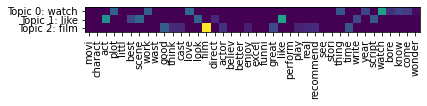

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Perplexity: -3.19
Topic 0: ['watch', 'love', 'plot']
Topic 1: ['like', 'act', 'scene']
Topic 2: ['film', 'good', 'time']
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.   ['(0, 23.0%)', '(1, 25.6%)', '(2, 51.4%)']
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.   ['(0, 23.0%)', '(1, 25.6%)', '(2, 51.4%)']
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.   ['(0, 30.3%)', '(1, 32.2%)', '(2, 37.4%)']
Very little music or anything to speak of.   ['(0, 23.0%)', '(1, 25.6%)', '(2, 51.4%)']
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.   ['(0, 16.8%)', '(1, 45.7%)', '(2, 37.4%)']
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.   ['(0, 35.1%)', '(1

In [58]:
test_eta('auto', dictionary, ntopics=3)

In [59]:
def create_eta(priors, etadict, ntopics):
    eta = np.full(shape=(ntopics, len(etadict)), fill_value=1) # create a (ntopics, nterms) matrix and fill with 1
    for word, topic in priors.items(): # for each word in the list of priors
        keyindex = [index for index,term in etadict.items() if term==word] # look up the word in the dictionary
        if (len(keyindex)>0): # if it's in the dictionary
            eta[topic,keyindex[0]] = 1e7  # put a large number in there
    eta = np.divide(eta, eta.sum(axis=0)) # normalize so that the probabilities sum to 1 over all topics
    return eta

In [60]:
apriori_original = {'recommend':0,'Long':0,'unnecessary':0,'whiny':0,'no':0,'crap':0,'doomed':0,'boring':0,
                    'good':1,'chills':1,'better':1,'funni':1,'great':1,'perfected':1,'loved':1,'fascinated':1 }  # I have mentioned only 2 topics 
eta = create_eta(apriori_original, dictionary, 2)

In [61]:
eta

array([[5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 9.999999e-08, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 9.999999e-08, 5.000000e-01,
        5.000000e-01, 9.999999e-08, 9.999999e-08, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 9.999999e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01],
       [5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 9.999999e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 5.000000e-01, 5.000000e-01,
        5.000000e-01, 5.000000e-01, 9.999999e-01, 5.000000e-01,
        5.000000e-01, 9.999999e-01, 9.9

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

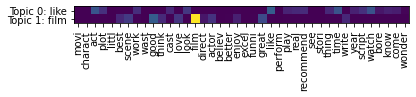

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Perplexity: -3.09
Topic 0: ['like', 'act', 'time']
Topic 1: ['film', 'good', 'great']
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.   ['(0, 50.9%)', '(1, 49.1%)']
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.   ['(0, 50.9%)', '(1, 49.1%)']
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.   ['(0, 60.1%)', '(1, 39.9%)']
Very little music or anything to speak of.   ['(0, 50.9%)', '(1, 49.1%)']
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.   ['(0, 41.5%)', '(1, 58.5%)']
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.   ['(0, 55.7%)', '(1, 44.3%)']
Wasted two hours.   ['(0, 50.9%)', '(1, 49.1%)']
Saw the movie today and thought it was a good

In [62]:
test_eta(eta, dictionary, ntopics=2)